In [1]:
import numpy.random as rd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def MontyHallSetUp():
    a = rd.randint(0,2)
    if a == 1:
        b = 0
        c = 0
    else:
        b = rd.randint(0,2)
        if b == 1:
            c = 0
        else:
            c = 1
    doors = [a,b,c] # The doors: the 0s are zonks and the 1 is the prize
    return doors

In [3]:
def MontyHall(N):
    resultschange = []
    resultskeep = []
    for i in range(N):
        doors = MontyHallSetUp() #Setting up the Zonks and prize
        intchoice = rd.randint(0,3) #choosing randomly among doors 1,2,3
        choice = doors[intchoice] #What's behind the door?
        resultskeep.append(choice) #The keep scenario ends here
        del doors[intchoice] # The door chosen by the contestant is eliminated from the host's choices of what to show next.
        i = 0
        for d in doors:
            if d == 0: #If there's a Zonk behind a door not chosen, there's either a 100% or 50% probability of it being shown
                del doors[i]
                break
            else:
                i += 1
        newchoice = doors[0] #The doors list is left with the unknown door. The change scenario ends here.
        resultschange.append(newchoice)
    probchange = sum(resultschange) / N
    probkeep = sum(resultskeep) / N
    return probchange,probkeep

In [4]:
probchange, probkeep = MontyHall(10000)

In [5]:
print("Probability of winning by changing door: %.3f" % probchange)
print("Probability of winning by keeping door: %.3f" % probkeep)

Probability of winning by changing door: 0.661
Probability of winning by keeping door: 0.339


# Problem 2

In [6]:
Tmax = 5. #hrs
Tmaxsec = Tmax*3600.
TAUBi213 = 2760. #sec
TAUTl209 = 132. #sec
TAUPb209 = 198. #sec

In [7]:
NBi213 = 10000 #initializing the number of atoms
NTl209 = 0
NPb209 = 0
NBi209 = 0
dt = 1. #sec
T = np.arange(0,Tmaxsec,dt)
ProbBi213toTl209 = 0.0209
Bi213 = []
Tl209 = []
Pb209 = []
Bi209 = []

In [8]:
file = open("Decay_Data.txt", 'w')
file.write("Time   Bi213   Tl209   Pb209   Bi209 \n")
for t in T:
    for n in range(NBi213):
        randfactor = rd.random()
        p = 1 - 2**(-dt/TAUBi213)
        if randfactor <= p:
            NBi213 -= 1
            randfactor2 = rd.random()
            if randfactor2 <= ProbBi213toTl209:
                NTl209 += 1
            else:
                NPb209 += 1
    for n in range(NTl209):
        randfactor = rd.random()
        p = 1 - 2**(-dt / TAUTl209)
        if randfactor <= p:
            NTl209 -= 1
            NPb209 += 1
    for n in range(NPb209):
        randfactor = rd.random()
        p = 1 - 2**(-dt/TAUPb209)
        if randfactor <= p:
            NPb209 -= 1
            NBi209 += 1
    Bi213.append(NBi213)
    Tl209.append(NTl209)
    Pb209.append(NPb209)
    Bi209.append(NBi209)
    N = NBi213 + NTl209 + NPb209 + NBi209 #Making sure I don't lose atoms ;)
    if t % 100 == 0:
        print(N)
        print(t)
        print("")
    file.write("%d      %d      %d      %d       %d \n" % (t,NBi213,NTl209,NPb209,NBi209))


10000
0.0

10000
100.0

10000
200.0

10000
300.0

10000
400.0

10000
500.0

10000
600.0

10000
700.0

10000
800.0

10000
900.0

10000
1000.0

10000
1100.0

10000
1200.0

10000
1300.0

10000
1400.0

10000
1500.0

10000
1600.0

10000
1700.0

10000
1800.0

10000
1900.0

10000
2000.0

10000
2100.0

10000
2200.0

10000
2300.0

10000
2400.0

10000
2500.0

10000
2600.0

10000
2700.0

10000
2800.0

10000
2900.0

10000
3000.0

10000
3100.0

10000
3200.0

10000
3300.0

10000
3400.0

10000
3500.0

10000
3600.0

10000
3700.0

10000
3800.0

10000
3900.0

10000
4000.0

10000
4100.0

10000
4200.0

10000
4300.0

10000
4400.0

10000
4500.0

10000
4600.0

10000
4700.0

10000
4800.0

10000
4900.0

10000
5000.0

10000
5100.0

10000
5200.0

10000
5300.0

10000
5400.0

10000
5500.0

10000
5600.0

10000
5700.0

10000
5800.0

10000
5900.0

10000
6000.0

10000
6100.0

10000
6200.0

10000
6300.0

10000
6400.0

10000
6500.0

10000
6600.0

10000
6700.0

10000
6800.0

10000
6900.0

10000
7000.0

10000
7100.0

1000

In [9]:
Bi213 = np.array(Bi213)
Tl209 = np.array(Tl209)
Pb209 = np.array(Pb209)
Bi209 = np.array(Bi209)
T_hrs = T/3600 #translating to minutes

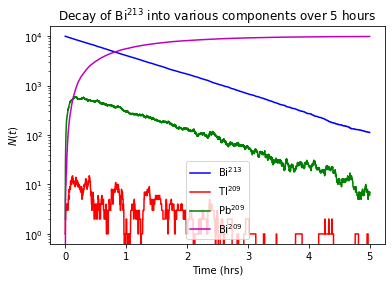

In [11]:
plt.semilogy(T_hrs,Bi213,'b-',label="Bi$^{213}$")
plt.semilogy(T_hrs,Tl209,'r-',label="Tl$^{209}$")
plt.semilogy(T_hrs,Pb209,'g-',label="Pb$^{209}$")
plt.semilogy(T_hrs,Bi209,'m-',label="Bi$^{209}$")
plt.legend()
plt.title("Decay of Bi$^{213}$ into various components over 5 hours")
plt.xlabel("Time (hrs)")
plt.ylabel("$N(t)$")
plt.savefig("Decay_Bi_213.svg")
plt.show()